<a href="https://colab.research.google.com/github/ldaniel/Advanced-Statistical-Modelling/blob/master/notebooks/group/Trabalho%20em%20Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Trabalho em Grupo
(até 4 integrantes)

- **Curso:** FGV MBA - Business Analytics and Big Data
- **Disciplina:** Modelagem Estatística Avançada
- **Professor:** Rodrigo Marotti Togneri

## Alunos
|Github|Nome|Matricula|E-mail|
|---|---|---|---|
|<a href="https://github.com/DanielFCampos"><img src="https://avatars2.githubusercontent.com/u/31582602?s=460&v=4" title="DanielFCampos" width="40" height="40"></a>|Daniel Campos|A57635769|[daniel.ferraz.campos@gmail.com](daniel.ferraz.campos@gmail.com)|
|<a href="https://github.com/ldaniel"><img src="https://avatars2.githubusercontent.com/u/205534?s=460&v=4" title="ldaniel" width="40" height="40"></a>|Leandro Daniel|A57622988|[contato@leandrodaniel.com](contato@leandrodaniel.com)|
|<a href="https://github.com/RodriGonca"><img src="https://avatars2.githubusercontent.com/u/50252438?s=460&v=4" title="RodriGonca" width="40" height="40"></a>|Rodrigo Goncalves|A57566093|[rodrigo.goncalves@me.com](rodrigo.goncalves@me.com)|
|<a href="https://github.com/ygorlima1"><img src="https://avatars2.githubusercontent.com/u/52429828?s=460&v=4" title="ygorlima1" width="40" height="40"></a>|Ygor Lima|A57549661|[ygor_redesocial@hotmail.com](ygor_redesocial@hotmail.com)|


# Enunciado
Escolha um dentre os seguintes datasets:
- Gas Prices in Brazil 2004-2019 (compartilhado em sala de aula)
- Outro da preferência do grupo. <p>

Para o dataset escolhido, deve-se:

1. **CONTEXTO:** Contextualizar brevemente os dados (de que tratam os dados? 1 parágrafo entre 5 e 10 linhas). <p>
2. **QUESTÕES DE NEGÓCIO:** Estabelecer uma questão relevante a ser respondida. <p>
3. **MONTAGEM DE DATASET:** Montar o(s) dataset(s) final(is) para responder as questões. <p>
4. **CARACTERIZAÇÃO DE DATASETS:** Caracterizar as colunas (nome, tipo, significado). <p>
5. **VISUALIZAÇÃO E DISCUSSÃO:** <p>
<p> a.	Gerar plots que permitam tirar conclusões claras dos dados (a questão deve ser suficientemente complexa para que exija minimamente dois gráficos distintos complementares). <p>
<p> b.	Os gráficos devem ser interpretados e discutidos, e as conclusões acerca dos mesmos e das questões de negócio devem ser apresentadas <p>
6. **CONCLUSÕES:** Relembrar a questão levantada e sumarizar as conclusões obtidas.
<p><p>
O trabalho deverá ser desenvolvido em Jupyter notebook e deverá ser entregue na data combinada com o professor em formato .ipynb já rodado e com outputs salvos no arquivo entregue. Organize o documento de modo que ele esteja dividido nas 6 seções propostas acima.




# Respostas

## 1. CONTEXTO: Contextualizar brevemente os dados (de que tratam os dados? 1 parágrafo entre 5 e 10 linhas).

Escolhemos trabalhar com o dataset fornecido referente ao [histórico de preços de combustíveis de 2004 a 2019.](https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil)

A ANP (Agencia Nacional de Petróleo) publica semanalmente relatórios de Gás, Diesel e outros combustíveis usados no país. 

Esta publicação traz o valor médio, mínimo e máximo, de revenda e distribuição, por unidade de medida padrão de cada combustível, agrupados por região e unidade da federação.

O conjunto de dados apresenta os preços de revenda e distribuiçao, (médio, mínimo e máximo), em periodicidade semanal para os seguintes produtos:
- ETANOL HIDRATADO
- GASOLINA COMUM
- GLP
- GNV
- ÓLEO DIESEL
- ÓLEO DIESEL S10

Além dos preços de revenda e distribuiçao, (médio, mínimo e máximo), o conjunto de dados apresneta algumas informações adicionais:
- Número de postos pesquisados
- Unidade de medida
- Desvio padão
- Margem média
- Coeficientes de variação

## 2. QUESTÕES DE NEGÓCIO: Estabelecer uma questão relevante a ser respondida.

Avaliar o comportamentos dos preços de combustíveis correlacionando com informacões adicionais como cotação internacional do barril de petroleo, flutuações da taxa câmbio, alterações da política de preços praticados pela Petrobras.

## 3. MONTAGEM DE DATASET: Montar o(s) dataset(s) final(is) para responder as questões.

Vamos iniciar pela importação dos dados em um pandas dataframe.

Neste passo nos preocupamos de definir os nomes das variáveis bem como o correto ***data type*** de cada coluna.

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option("display.precision", 3)
pd.set_option('display.expand_frame_repr', False)

dtype = {'INDEX': np.int32, 
         'DATA INICIAL': np.object, 
         'DATA FINAL': np.object,
         'REGIÃO': 'category', 
         'ESTADO': 'category', 
         'PRODUTO': 'category',
         'NÚMERO DE POSTSOS PESQUISADOS': np.int32, 
         'UINDADE DE MEDIDA': 'category', 
         'PREÇO MÉDIO REVENDA': np.float64,
         'DESVIO PADRÃO REVENDA': np.float64, 
         'PRECO MÍNIMO REVENDA': np.float64, 
         'PRECO MÁXIMO REVENDA': np.float64,
         'MARGEM MÉDIA REVENDA': np.float64, 
         'COEF DE VARIAÇÃO REVENDA': np.float64, 
         'PREÇO MÉDIO DISTRIBUIÇÃO': np.float64,
         'DESVIO PADRÃO DISTRIBUIÇÃO': np.float64, 
         'PREÇO MÍNIMO DISTRIBUIÇÃO': np.float64, 
         'PREÇO MÁXIMO DISTRIBUIÇÃO': np.float64,
         'COEF DE VARIAÇÃO DISTRIBUIÇÃO': np.float64}

df_prices = pd.read_csv('..//..//data//raw/data_gasPricesBR_2004-2019.tsv', 
                        sep = '\t',
                        dtype = dtype,
                        names = list(dtype),
                        skiprows = 1,
                        usecols = list(dtype),
                        index_col = 'INDEX',
                        na_values = ['-'],
                        parse_dates = ['DATA INICIAL', 'DATA FINAL'])

df_prices.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTSOS PESQUISADOS,UINDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
INDEX,,,,,,,,,,,,,,,,,,
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.420,0.967,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.501,1.050,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.561,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.599,1.222,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.744,1.032,0.082


In [5]:
import os
os.getcwd()

'C:\\SystemLog\\0 - MyGitProjects\\Advanced-Statistical-Modelling\\notebooks\\group'

Vamos avaliar algumas características dos dados importados, como data types de cada variável, missing values,

In [6]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 18 columns):
DATA INICIAL                     106823 non-null datetime64[ns]
DATA FINAL                       106823 non-null datetime64[ns]
REGIÃO                           106823 non-null category
ESTADO                           106823 non-null category
PRODUTO                          106823 non-null category
NÚMERO DE POSTSOS PESQUISADOS    106823 non-null int32
UINDADE DE MEDIDA                106823 non-null category
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PRECO MÍNIMO REVENDA             106823 non-null float64
PRECO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             103392 non-null float64
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         103423 non-null float64
DESVIO PADRÃO DISTRIBUIÇÃO       103423 non-null float64
PREÇO MÍNIMO DISTR

Como podemos perceber temos alguns valores faltantes para algumas variáveis

In [7]:
df_prices.isnull().sum(axis = 0)

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTSOS PESQUISADOS       0
UINDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PRECO MÍNIMO REVENDA                0
PRECO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
dtype: int64

Agora podemos enriquecer os dados extraindo da **DATA INICIAL** informações como ano, mês e semana.

In [8]:
df_prices['ANO'] = pd.DatetimeIndex(df_prices['DATA INICIAL']).year
df_prices['MES'] = pd.DatetimeIndex(df_prices['DATA INICIAL']).month
df_prices['SEMANA'] = pd.DatetimeIndex(df_prices['DATA INICIAL']).week
df_prices[['DATA INICIAL', 'DATA FINAL', 'ANO', 'MES', 'SEMANA']]

,DATA INICIAL,DATA FINAL,ANO,MES,SEMANA
INDEX,,,,,
0,2004-05-09,2004-05-15,2004,5,19
1,2004-05-09,2004-05-15,2004,5,19
2,2004-05-09,2004-05-15,2004,5,19
3,2004-05-09,2004-05-15,2004,5,19
4,2004-05-09,2004-05-15,2004,5,19
5,2004-05-09,2004-05-15,2004,5,19
6,2004-05-09,2004-05-15,2004,5,19
7,2004-05-09,2004-05-15,2004,5,19
8,2004-05-09,2004-05-15,2004,5,19


## 4. CARACTERIZAÇÃO DE DATASETS: Caracterizar as colunas (nome, tipo, significado).

## 5. **VISUALIZAÇÃO E DISCUSSÃO:**

### a. Gerar plots que permitam tirar conclusões claras dos dados (a questão deve ser suficientemente complexa para que exija minimamente dois gráficos distintos complementares).

Como exemplo podemos avaliar a evolução da média semanal anual dos preços de **REVENDA** e **DISTRIBUIÇÃO** da **GASOLINA COMUM** no estado de **SAO PAULO**

In [9]:
df_gas_sp = df_prices[(df_prices['PRODUTO'] == 'GASOLINA COMUM') & 
                      (df_prices['ESTADO'] == 'SAO PAULO')].groupby(['PRODUTO', 'ESTADO', 'ANO'])

df_gas_sp[['ANO','PREÇO MÉDIO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO']].describe(include = [np.float64])

PREÇO MÉDIO REVENDA                                                  PREÇO MÉDIO DISTRIBUIÇÃO                                                 
                                            count   mean    std    min    25%    50%    75%    max                    count   mean    std    min    25%    50%    75%    max
PRODUTO        ESTADO    ANO                                                                                                                                                
GASOLINA COMUM SAO PAULO 2004                34.0  2.047  0.087  1.888  2.030  2.034  2.099  2.205                     34.0  1.804  0.082  1.655  1.776  1.798  1.852  1.948
                         2005                50.0  2.233  0.087  2.144  2.162  2.191  2.349  2.372                     50.0  1.979  0.084  1.893  1.908  1.942  2.087  2.119
                         2006                53.0  2.443  0.031  2.383  2.421  2.445  2.458  2.496                     53.0  2.175  0.031  2.125  2.144  2.179  2.196  2.226
                         2007                52.0  2.414  0.024  2.376  2.393  2.417  2.430  2.458                     52.0  2.094  0.042  2.039  2.050  2.086  2.128  2.161
                         2008                52.0  2.403  0.006  2.393  2.397  2.402  2.409  2.416                     52.0  2.086  0.011  2.071  2.077  2.083  2.094  2.107
                         2009                50.0  2.403  0.028  2.353  2.381  2.402  2.420  2.457                     50.0  2.087  0.030  2.043  2.059  2.087  2.107  2.140
                         2010                52.0  2.463  0.031  2.419  2.433  2.455  2.489  2.538                     52.0  2.131  0.033  2.087  2.099  2.119  2.164  2.196
                         2011                52.0  2.643  0.078  2.501  2.635  2.662  2.669  2.826                     52.0  2.274  0.072  2.176  2.250  2.268  2.276  2.497
                         2012                53.0  2.637  0.012  2.610  2.628  2.636  2.643  2.663                     53.0  2.256  0.008  2.242  2.250  2.256  2.261  2.276
                         2013                52.0  2.736  0.046  2.629  2.711  2.721  2.768  2.837                     52.0  2.339  0.041  2.261  2.314  2.325  2.375  2.426
                         2014                52.0  2.867  0.024  2.823  2.845  2.861  2.889  2.911                     52.0  2.462  0.021  2.429  2.444  2.455  2.480  2.498
                         2015                51.0  3.189  0.159  2.905  3.105  3.141  3.232  3.515                     51.0  2.770  0.143  2.497  2.713  2.734  2.800  3.061
                         2016                52.0  3.499  0.049  3.423  3.455  3.497  3.541  3.600                     52.0  3.047  0.054  2.972  2.998  3.043  3.096  3.155
                         2017                53.0  3.580  0.180  3.234  3.455  3.604  3.668  3.975                     53.0  3.135  0.202  2.771  2.981  3.144  3.257  3.576
                         2018                52.0  4.203  0.181  3.970  4.008  4.202  4.336  4.512                     52.0  3.760  0.164  3.563  3.620  3.756  3.862  4.085
                         2019                25.0  4.120  0.110  3.966  4.012  4.109  4.214  4.287                     25.0  3.691  0.149  3.483  3.562  3.713  3.816  3.914

Podemos visualizar os dados utilizando um gráfico de linha para um determinado **ESTADO** e **PRODUTO**.

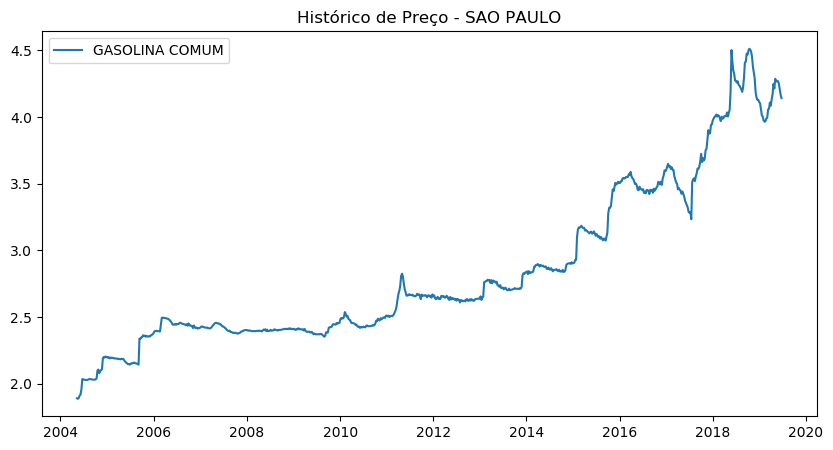

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use('default')
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 10})

df_plot = df_prices[(df_prices['PRODUTO'] == 'GASOLINA COMUM') & 
                      (df_prices['ESTADO'] == 'SAO PAULO')]

x = df_plot['DATA INICIAL']
y = df_plot['PREÇO MÉDIO REVENDA']

fig, ax = plt.subplots()

ax.plot(x, y, label = df_plot['PRODUTO'].iloc[0])

plt.title('Histórico de Preço - ' + df_plot['ESTADO'].iloc[0])
plt.legend()

plt.show()


Podemos fazer um loop por região e estado e verificar a evoluçao dos preços da **GASOLINA COMUM** por **REGIÃO** e **ESTADO**.

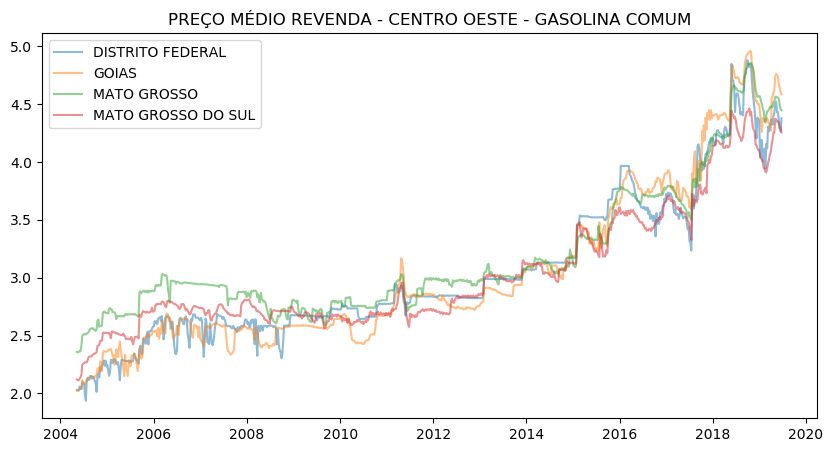

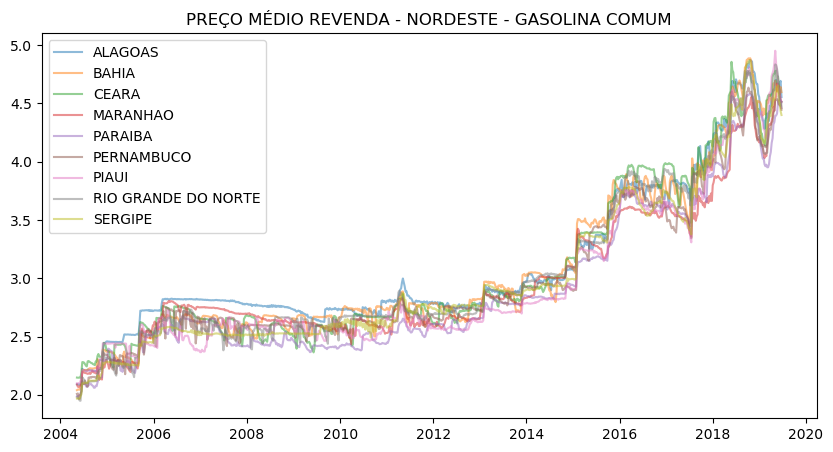

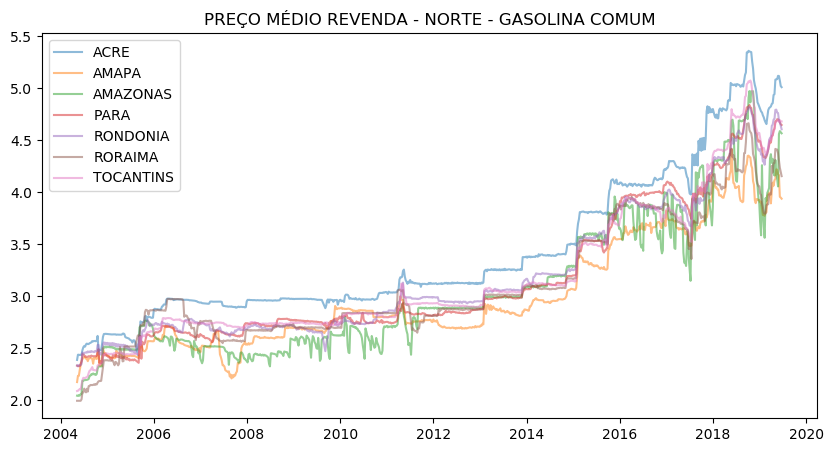

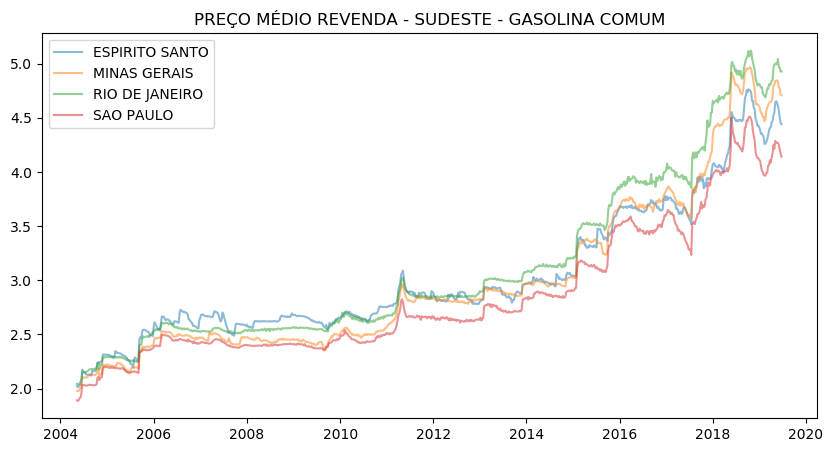

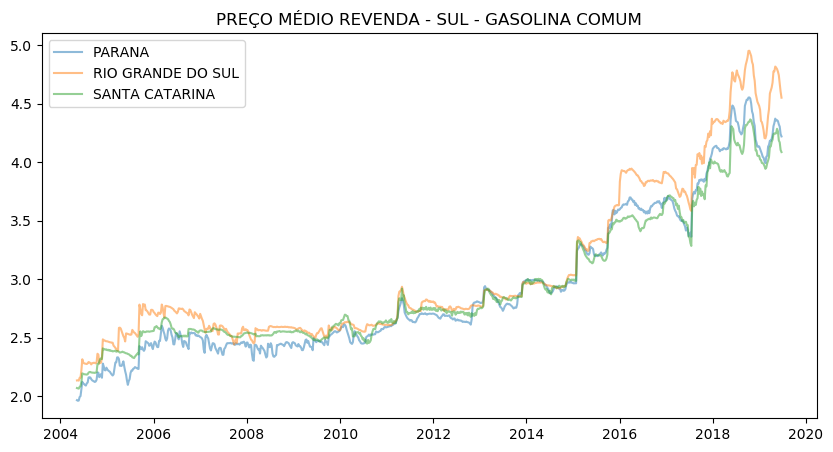

In [14]:
regions = df_prices['REGIÃO'].unique()

for region in regions:
    fig, ax = plt.subplots()
    df_plot = df_prices[(df_prices['REGIÃO'] == region) & (df_prices['PRODUTO'] == 'GASOLINA COMUM')]
    estados = df_plot['ESTADO'].unique()
    for estado in estados:
        df_plot_est = df_plot[(df_plot['ESTADO'] == estado)]
        x = df_plot_est['DATA INICIAL']
        y = df_plot_est['PREÇO MÉDIO REVENDA']
        ax.plot(x, y, 
                   label = df_plot_est['ESTADO'].iloc[0],
                   alpha = 0.5)
    plt.legend()
    plt.title('PREÇO MÉDIO REVENDA - ' + df_plot['REGIÃO'].iloc[0] + ' - ' + df_plot['PRODUTO'].iloc[0])
    plt.show()

### b. Os gráficos devem ser interpretados e discutidos, e as conclusões acerca dos mesmos e das questões de negócio devem ser apresentadas.

## 6. CONCLUSÕES: Relembrar a questão levantada e sumarizar as conclusões obtidas.